# Salary Prediction

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [3]:
dtime = pd.read_csv("D:/Data Science/Assignments/4 Simple Linear Regression/delivery_time.csv")

In [4]:
dtime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 400.0 bytes


In [6]:
dtime= dtime.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

In [7]:
dtime.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# Plotting the data to check for outliers

array([[<AxesSubplot:title={'center':'DT'}>,
        <AxesSubplot:title={'center':'ST'}>]], dtype=object)

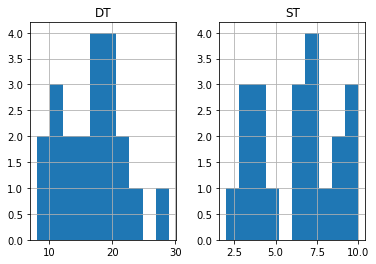

In [8]:
dtime.hist()

<AxesSubplot:>

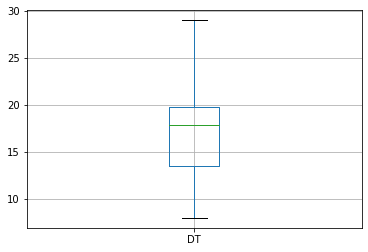

In [9]:
dtime.boxplot('DT')

<AxesSubplot:>

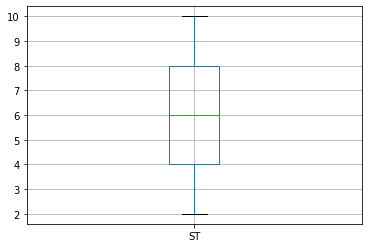

In [10]:
dtime.boxplot('ST')

# Building a regression model

In [11]:
model = smf.ols("DT~ST",data = dtime).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

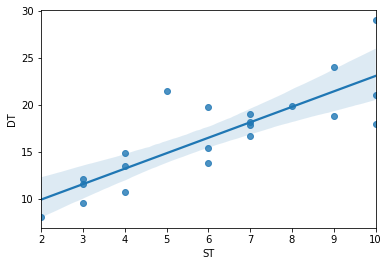

In [12]:
sns.regplot(x='ST', y='DT', data=dtime)

In [13]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Since R value is not good, we will try to further improve the model by removing outliers using cook's distance technique

In [15]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

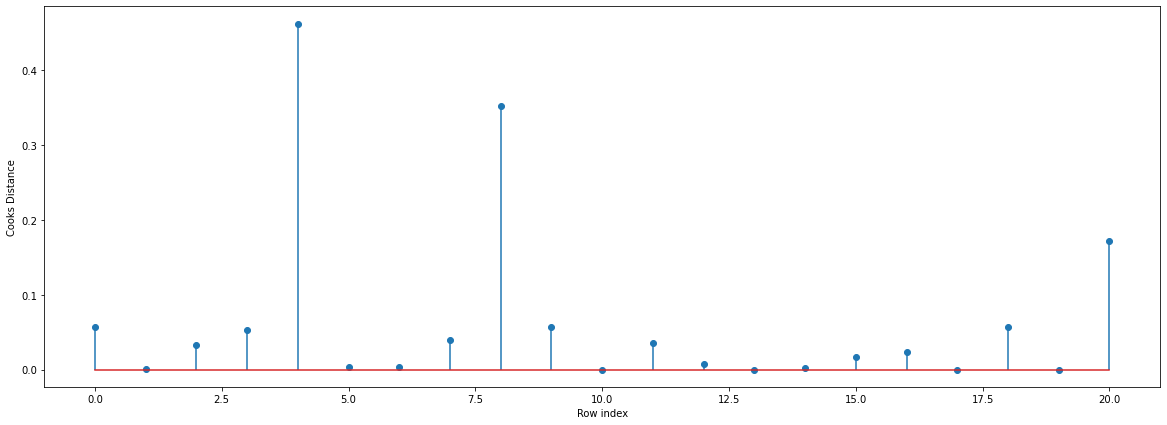

In [16]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dtime)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [17]:
(np.argmax(c),np.max(c))

(4, 0.46205304126503155)

In [18]:
dtime1= dtime.drop([4],axis=0)

In [19]:
dtime2 = dtime1.reset_index()

In [20]:
dtime3=dtime2.drop(['index'],axis=1)

In [21]:
model1 = smf.ols('DT~ST', data=dtime3).fit()

In [22]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    4.788039
ST           5.913837
dtype: float64 
 Intercept    0.000147
ST           0.000013
dtype: float64


In [23]:
(model1.rsquared,model1.rsquared_adj)

(0.660207261776224, 0.6413298874304587)

# Still R value is not good, we will go through cook's distance technique for identifying outliers again

In [24]:
model_influence = model1.get_influence()
(c1, _) = model_influence.cooks_distance

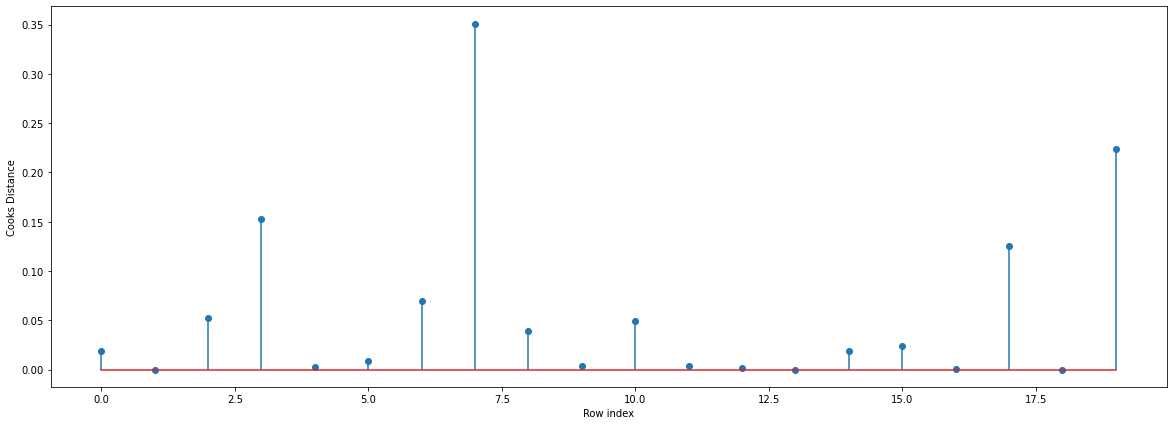

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dtime3)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c1),np.max(c1))

(7, 0.35089748038778834)

In [28]:
dtime4= dtime3.drop([7],axis=0)

In [29]:
dtime5 = dtime4.reset_index()

In [30]:
dtime6=dtime5.drop(['index'],axis=1)

In [31]:
model2 = smf.ols('DT~ST', data=dtime6).fit()

In [32]:
print(model2.tvalues, '\n', model2.pvalues)

Intercept    4.366444
ST           6.515847
dtype: float64 
 Intercept    0.000420
ST           0.000005
dtype: float64


In [33]:
(model2.rsquared,model2.rsquared_adj)

(0.7140755547043909, 0.6972564696870021)

# R vlaue has improved a bit, we will still continue with the same process till we stop seeing the progress

In [34]:
model_influence = model2.get_influence()
(c2, _) = model_influence.cooks_distance

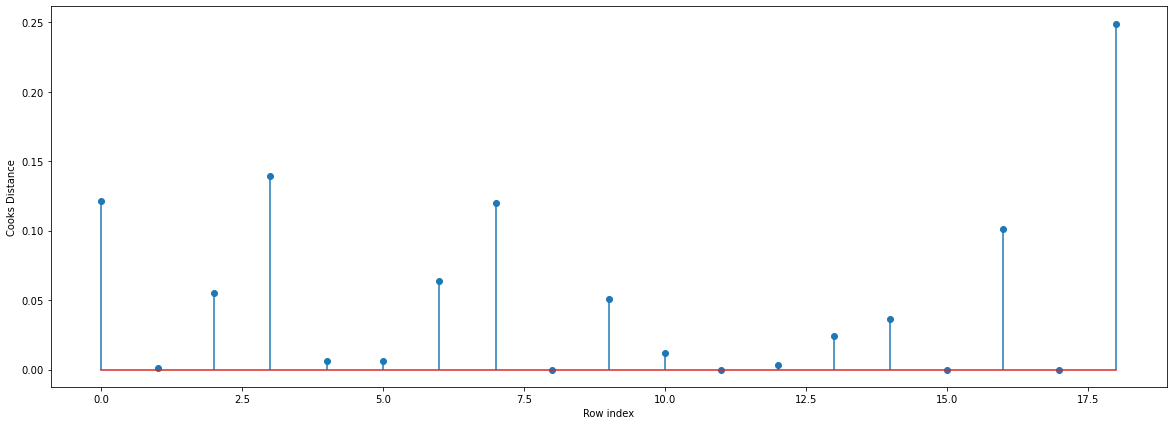

In [35]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dtime6)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c2),np.max(c2))

(18, 0.24932621731860263)

In [37]:
dtime7= dtime6.drop([18],axis=0)

In [38]:
dtime8 = dtime7.reset_index()

In [39]:
dtime9=dtime8.drop(['index'],axis=1)

In [40]:
model3 = smf.ols('DT~ST', data=dtime9).fit()

In [41]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept    5.126385
ST           8.941043
dtype: float64 
 Intercept    1.015144e-04
ST           1.273152e-07
dtype: float64


In [42]:
(model3.rsquared,model3.rsquared_adj)

(0.8332330202945817, 0.822810084062993)

In [43]:
# Since 0.833 is good value for R, we can either stop here or continue with the same process
# As data set contains only 17 observations, its not advisable to remove more data points
# We can still go through the same proess once againto see if it have any mojor effect on R value

In [44]:
model_influence = model3.get_influence()
(c3, _) = model_influence.cooks_distance

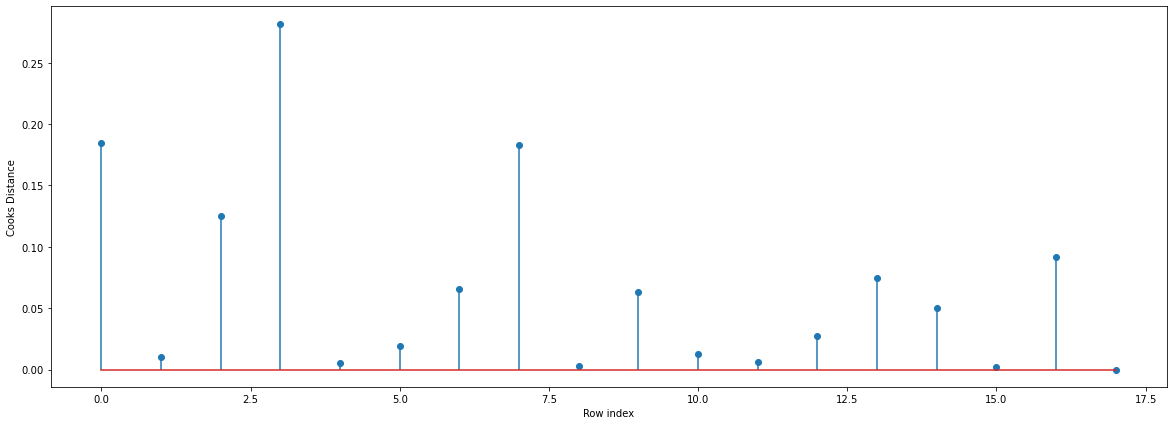

In [45]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dtime9)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
(np.argmax(c3),np.max(c3))

(3, 0.2823735976855821)

In [47]:
dtime10= dtime9.drop([3],axis=0)

In [48]:
dtime11 = dtime10.reset_index()

In [49]:
dtime12=dtime11.drop(['index'],axis=1)

In [50]:
model4 = smf.ols('DT~ST', data=dtime12).fit()

In [51]:
print(model4.tvalues, '\n', model4.pvalues)

Intercept    5.777777
ST           8.438153
dtype: float64 
 Intercept    3.646510e-05
ST           4.438326e-07
dtype: float64


In [52]:
(model4.rsquared,model4.rsquared_adj)

(0.8259909851443229, 0.8143903841539444)

In [53]:
# with this data point removal, R value has reduced so will condier the last R value (model3) as final vlaue.

In [54]:
(model3.rsquared,model3.rsquared_adj)

(0.8332330202945817, 0.822810084062993)

# Checking the model by predicting the delivery time of the same data set and comparing it with actual values

In [55]:
pred_DT = pd.DataFrame (model3.predict(dtime12), columns=['Predict_DT'])

In [56]:
pred_DT

,Predict_DT
0,22.764761
1,12.720305
2,16.068457
3,16.068457
4,17.742533
5,11.046229
6,21.090685
7,19.416609
8,12.720305
9,17.742533


In [57]:
pred_DT1 = pd.concat([dtime12, pred_DT], axis=1)

In [58]:
pred_DT1

,DT,ST,Predict_DT
0,21.00,10,22.764761
1,13.50,4,12.720305
2,19.75,6,16.068457
3,15.35,6,16.068457
4,19.00,7,17.742533
5,9.50,3,11.046229
6,18.75,9,21.090685
7,19.83,8,19.416609
8,10.75,4,12.720305
9,16.68,7,17.742533


In [59]:
Error = pd.DataFrame (((pred_DT1['Predict_DT']- pred_DT1['DT'])/pred_DT1['DT']), columns=['Error'])

In [60]:
result = pd.concat ([pred_DT1, Error], axis=1)

In [61]:
result

,DT,ST,Predict_DT,Error
0,21.00,10,22.764761,0.084036
1,13.50,4,12.720305,-0.057755
2,19.75,6,16.068457,-0.186407
3,15.35,6,16.068457,0.046805
4,19.00,7,17.742533,-0.066182
5,9.50,3,11.046229,0.162761
6,18.75,9,21.090685,0.124837
7,19.83,8,19.416609,-0.020847
8,10.75,4,12.720305,0.183284
9,16.68,7,17.742533,0.063701


In [62]:
result.style.format({'DT': "{:.2f}",'ST': "{:.2f}",'Predict_DT': "{:.2f}",'Error': "{:.2%}"})

,DT,ST,Predict_DT,Error
0,21.00,10.00,22.76,8.40%
1,13.50,4.00,12.72,-5.78%
2,19.75,6.00,16.07,-18.64%
3,15.35,6.00,16.07,4.68%
4,19.00,7.00,17.74,-6.62%
5,9.50,3.00,11.05,16.28%
6,18.75,9.00,21.09,12.48%
7,19.83,8.00,19.42,-2.08%
8,10.75,4.00,12.72,18.33%
9,16.68,7.00,17.74,6.37%


In [63]:
result.Error.mean()

0.022517326706489704

In [64]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecating is working well.